<a href="https://colab.research.google.com/github/ddiestra/avila-dataset/blob/master/Analisis_de_la_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis de la Data

In [52]:
!pip install --upgrade statsmodels
!sudo apt install -y graphviz
!pip install graphviz
from sklearn.preprocessing import LabelEncoder

Password:


In [53]:
import urllib.request
import zipfile, urllib.request, shutil
from __future__ import absolute_import, division, print_function, unicode_literals


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00577/codon_usage.csv.zip'
filename = 'codon_usage.csv.zip'


In [31]:

with urllib.request.urlopen(url) as response, open(filename, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(filename) as zf:
        zf.extractall()

In [32]:
!unzip codon_usage.csv

Archive:  codon_usage.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
Archive:  codon_usage.csv.zip
replace codon_usage.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [35]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 50)

%matplotlib inline

In [36]:
#Lectura del dataset
file_name = "codon_usage.csv"
dataset = pd.read_csv(file_name,  header=None)


/Users/yape/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [37]:
dataset.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,...,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
1,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,5e-04,0.00351,0.01203,0.03208,0.001,0.0401,0.00551,0.02005,0.00752,0.02506,0.01103,0.0411,0.00902,0.03308,0.01003,0.05013,0.01554,0.01103,...,0.00501,0.02256,0.00301,0.03108,0.00401,0.02607,0.00251,0.01153,0.00501,0.02356,0.01053,0.0386,0.00401,0.00702,0.00401,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,5e-04,0
2,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.0441,0.01153,0.0251,0.00882,0.03324,0.00814,0.04071,0.00814,0.03256,0.01085,0.04885,0.01221,0.01357,...,0.00475,0.02917,0.00407,0.02374,0.00882,0.02917,0.00271,0.01628,0.00204,0.01967,0.00543,0.03392,0.00136,0.00678,0.00136,0.00136,0.01696,0.03596,0.01221,0.04545,0.0156,0.0441,0.00271,0.00068,0
3,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316,0.0218,0.01625,0.01872,0.01213,0.0107,0.02406,0.01234,0.0144,0.00514,...,0.02612,0.01275,0.01522,0.02365,0.02962,0.01789,0.01625,0.01234,0.01604,0.01687,0.02077,0.03949,0.00864,0.00596,0.00926,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0,0.00144
4,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.0094,0.01723,0.02402,0.02245,0.02507,0.02924,0.02089,0.02141,0.01723,0.01932,0.02141,0.00679,0.02245,0.00522,...,0.02141,0.00888,0.01567,0.01253,0.02298,0.01358,0.00992,0.00888,0.00783,0.00679,0.03133,0.04282,0.00627,0.00261,0.00261,0.00366,0.0141,0.01671,0.0376,0.01932,0.03029,0.03446,0.00261,0.00157,0
5,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.0138,0.00548,0.00473,0.02076,0.02716,0.00867,0.0131,0.02773,0.02803,0.00508,0.0092,0.02965,0.02878,0.00574,0.01572,0.01577,...,0.02089,0.01367,0.01502,0.01809,0.02738,0.01796,0.01082,0.00705,0.01174,0.00858,0.03408,0.03964,0.0095,0.00429,0.00578,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0,0.00044,0.00131
6,vrl,0,101029,5274,Human adenovirus type 7d,0.02579,0.02218,0.01479,0.01024,0.02294,0.00758,0.01782,0.01403,0.02636,0.01327,0.01896,0.02579,0.01877,0.01346,0.00721,0.01782,0.02067,0.02313,0.01214,0.00265,...,0.01555,0.02825,0.01953,0.01251,0.03906,0.03546,0.01138,0.00948,0.00683,0.01043,0.03223,0.00986,0.00398,0.00853,0.00322,0.00303,0.01593,0.00171,0.02427,0.02503,0.02825,0.0127,0.00133,0.00038,0.00209
7,vrl,0,101688,3042,Apple latent spherical virus,0.04635,0.01545,0.02005,0.024,0.02761,0.01611,0.01052,0.00493,0.02597,0.00888,0.01512,0.02268,0.02893,0.00789,0.01151,0.01611,0.04011,0.01151,0.01118,0.00427,...,0.02465,0.01151,0.02465,0.01085,0.03452,0.01348,0.01545,0.0069,0.01512,0.00756,0.02926,0.02696,0.00888,0.00625,0.0069,0.00329,0.01315,0.00822,0.04011,0.01183,0.02663,0.02663,0.00033,0.00033,0
8,vrl,0,101764,2801,Aconitum latent virus,0.02285,0.02678,0.01214,0.02321,0.01714,0.02213,0.00893,0.01928,0.01785,0.02356,0.01107,0.01999,0.01714,0.01142,0.00893,0.02499,0.03106,0.01357,0.01571,0.01321,...,0.01142,0.02321,0.01856,0.01107,0.0282,0.01535,0.01142,0.01821,0.01071,0.01464,0.02785,0.02713,0.01499,0.01607,0.00714,0.00678,0.0125,0.01107,0.03534,0.01571,0.03642,0.02785,0.00107,0.00036,0.00071
9,vrl,0,101947,2897,Pseudorabies virus Ea,0.01105,0.02106,0.00035,0.00104,0.00035,0.04142,0.00069,0.05868,0.00104,0.01933,0.00173,0.01691,0,0.04004,0.00069,0.04522,0.00276,0.06973,0.00069,0.05212,...,0.00173,0.02485,0.00138,0.01622,0.00138,0.01519,0.00035,0.01968,0.00173,0.01933,0.00035,0.00897,0.00207,0.0535,0.00311,0.02658,0.00207,0.00311,0.00414,0.04556,0.00449,0.04867,0.00138,0.00035,0.00

In [38]:
# Eliminando columnas inválidas
columns = dataset.iloc[0]
dataset.columns = columns
dataset = dataset.drop([0],axis=0)
dataset

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,...,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
1,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,5e-04,0.00351,0.01203,0.03208,0.001,0.0401,0.00551,0.02005,0.00752,0.02506,0.01103,0.0411,0.00902,0.03308,0.01003,0.05013,0.01554,0.01103,...,0.00501,0.02256,0.00301,0.03108,0.00401,0.02607,0.00251,0.01153,0.00501,0.02356,0.01053,0.0386,0.00401,0.00702,0.00401,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,5e-04,0
2,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.0441,0.01153,0.0251,0.00882,0.03324,0.00814,0.04071,0.00814,0.03256,0.01085,0.04885,0.01221,0.01357,...,0.00475,0.02917,0.00407,0.02374,0.00882,0.02917,0.00271,0.01628,0.00204,0.01967,0.00543,0.03392,0.00136,0.00678,0.00136,0.00136,0.01696,0.03596,0.01221,0.04545,0.0156,0.0441,0.00271,0.00068,0
3,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316,0.0218,0.01625,0.01872,0.01213,0.0107,0.02406,0.01234,0.0144,0.00514,...,0.02612,0.01275,0.01522,0.02365,0.02962,0.01789,0.01625,0.01234,0.01604,0.01687,0.02077,0.03949,0.00864,0.00596,0.00926,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0,0.00144
4,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.0094,0.01723,0.02402,0.02245,0.02507,0.02924,0.02089,0.02141,0.01723,0.01932,0.02141,0.00679,0.02245,0.00522,...,0.02141,0.00888,0.01567,0.01253,0.02298,0.01358,0.00992,0.00888,0.00783,0.00679,0.03133,0.04282,0.00627,0.00261,0.00261,0.00366,0.0141,0.01671,0.0376,0.01932,0.03029,0.03446,0.00261,0.00157,0
5,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.0138,0.00548,0.00473,0.02076,0.02716,0.00867,0.0131,0.02773,0.02803,0.00508,0.0092,0.02965,0.02878,0.00574,0.01572,0.01577,...,0.02089,0.01367,0.01502,0.01809,0.02738,0.01796,0.01082,0.00705,0.01174,0.00858,0.03408,0.03964,0.0095,0.00429,0.00578,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13024,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.0082,0.03555,0.01459,0.0392,0.01003,0.02097,0.00912,0.02005,0.01003,0.03737,0.02279,0.01367,0.01094,0.0,...,0.0237,0.02097,0.02917,0.03464,0.02005,0.02005,0.01459,0.02461,0.01367,0.01459,0.01914,0.03008,0.00182,0.00547,0.00547,0.0082,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13025,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,0.01258,0.03096,0.06386,0.03435,0.01258,0.00629,0.01258,0.01451,0.00871,0.01161,0.03338,0.02129,0.00242,...,0.01016,0.0208,0.02177,0.00339,0.00822,0.03532,0.00242,0.00435,0.0029,0.01693,0.02661,0.0029,0.00097,0.00726,0.00629,0.00145,0.0,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13026,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,0.01068,0.02728,0.06643,0.02669,0.01246,0.00297,0.01542,0.01423,0.0,0.00949,0.03915,0.0172,0.00119,...,0.00712,0.02017,0.01898,0.0083,0.00652,0.03203,0.00119,0.00356,0.00474,0.02017,0.02432,0.00297,0.00119,0.0083,0.01186,0.0,0.0,0.0,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13027,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,0.03964,0.016,0.02082,0.00749,0.02204,0.01103,0.01446,0.00708,0.02812,0.01845,0.02773,0.01582,0.00737,...,0.01219,0.01531,0.01234,0.03423,0.01696,0.0191,0.01058,0.01262,0.01086,0.01509,0.02444,0.03186,0.00454,0.01042,0.00617,0.01142,

In [39]:
# Se muestra el porcentaje de registros únicos
dataset.nunique() / len(dataset)

0
Kingdom        0.000844
DNAtype        0.001228
SpeciesID      0.949340
Ncodons        0.647605
SpeciesName    0.999079
                 ...   
GAA            0.506985
GAG            0.479122
UAA            0.088271
UAG            0.053347
UGA            0.162266
Length: 69, dtype: float64

In [40]:
#Determinamos aquellas variables que tengan un porcentaje de registros nulos por cada variable mayor al valor de 0.4
threshold = 0.4

null_percentages = dataset.isna().sum() / len(dataset)
null_percentages >threshold

0
Kingdom        False
DNAtype        False
SpeciesID      False
Ncodons        False
SpeciesName    False
               ...  
GAA            False
GAG            False
UAA            False
UAG            False
UGA            False
Length: 69, dtype: bool

In [41]:
dataset.dtypes # Revisamos los tipos de datos de cada variable.

0
Kingdom        object
DNAtype        object
SpeciesID      object
Ncodons        object
SpeciesName    object
                ...  
GAA            object
GAG            object
UAA            object
UAG            object
UGA            object
Length: 69, dtype: object

In [42]:
cols = dataset.columns[dataset.dtypes.eq(object)] # Seleccionamos las columnas con el tipo de datao : Object
dataset = dataset[cols].apply(pd.to_numeric, errors='ignore') #se transforma

In [43]:
cols = dataset.columns[dataset.dtypes.eq(object)] # Verificamos que aún hay columnas que deberían ser númericas.
cols

Index(['Kingdom', 'SpeciesName', 'UUU', 'UUC'], dtype='object', name=0)

In [236]:
#dataset['SpeciesName']

1        Epizootic haematopoietic necrosis virus
2                               Bohle iridovirus
3                   Sweet potato leaf curl virus
4                   Northern cereal mosaic virus
5                 Soil-borne cereal mosaic virus
                          ...                   
13024                      Pongo pygmaeus abelii
13025        mitochondrion Pongo pygmaeus abelii
13026      mitochondrion Pongo pygmaeus pygmaeus
13027                               Homo sapiens
13028                 mitochondrion Homo sapiens
Name: SpeciesName, Length: 13028, dtype: object

In [44]:
# Se observa que hay datos str que no permiten manipular los demás como numéricos, por lo tanto se va a forzar.
dataset[['UUU', 'UUC']] = dataset[['UUU', 'UUC']].apply(pd.to_numeric, errors='coerce')
null_percentages = dataset['UUU'].isna().sum()
null_percentages

2

In [46]:
dataset['SpeciesName'] = dataset['SpeciesName'].astype(str) # Está columna contiene datos descriptivos, por tanto será transformada a str.
dataset['SpeciesName']

1        Epizootic haematopoietic necrosis virus
2                               Bohle iridovirus
3                   Sweet potato leaf curl virus
4                   Northern cereal mosaic virus
5                 Soil-borne cereal mosaic virus
                          ...                   
13024                      Pongo pygmaeus abelii
13025        mitochondrion Pongo pygmaeus abelii
13026      mitochondrion Pongo pygmaeus pygmaeus
13027                               Homo sapiens
13028                 mitochondrion Homo sapiens
Name: SpeciesName, Length: 13028, dtype: object

In [47]:
cols = dataset.columns[dataset.dtypes.eq(object)]
cols

Index(['Kingdom', 'SpeciesName'], dtype='object', name=0)

In [48]:
dataset

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,...,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
1,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752,0.02506,0.01103,0.04110,0.00902,0.03308,0.01003,0.05013,0.01554,0.01103,...,0.00501,0.02256,0.00301,0.03108,0.00401,0.02607,0.00251,0.01153,0.00501,0.02356,0.01053,0.03860,0.00401,0.00702,0.00401,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
2,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882,0.03324,0.00814,0.04071,0.00814,0.03256,0.01085,0.04885,0.01221,0.01357,...,0.00475,0.02917,0.00407,0.02374,0.00882,0.02917,0.00271,0.01628,0.00204,0.01967,0.00543,0.03392,0.00136,0.00678,0.00136,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
3,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316,0.02180,0.01625,0.01872,0.01213,0.01070,0.02406,0.01234,0.01440,0.00514,...,0.02612,0.01275,0.01522,0.02365,0.02962,0.01789,0.01625,0.01234,0.01604,0.01687,0.02077,0.03949,0.00864,0.00596,0.00926,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
4,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507,0.02924,0.02089,0.02141,0.01723,0.01932,0.02141,0.00679,0.02245,0.00522,...,0.02141,0.00888,0.01567,0.01253,0.02298,0.01358,0.00992,0.00888,0.00783,0.00679,0.03133,0.04282,0.00627,0.00261,0.00261,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
5,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310,0.02773,0.02803,0.00508,0.00920,0.02965,0.02878,0.00574,0.01572,0.01577,...,0.02089,0.01367,0.01502,0.01809,0.02738,0.01796,0.01082,0.00705,0.01174,0.00858,0.03408,0.03964,0.00950,0.00429,0.00578,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13024,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,0.03555,0.01459,0.03920,0.01003,0.02097,0.00912,0.02005,0.01003,0.03737,0.02279,0.01367,0.01094,0.00000,...,0.02370,0.02097,0.02917,0.03464,0.02005,0.02005,0.01459,0.02461,0.01367,0.01459,0.01914,0.03008,0.00182,0.00547,0.00547,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13025,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,0.01258,0.03096,0.06386,0.03435,0.01258,0.00629,0.01258,0.01451,0.00871,0.01161,0.03338,0.02129,0.00242,...,0.01016,0.02080,0.02177,0.00339,0.00822,0.03532,0.00242,0.00435,0.00290,0.01693,0.02661,0.00290,0.00097,0.00726,0.00629,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13026,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,0.01068,0.02728,0.06643,0.02669,0.01246,0.00297,0.01542,0.01423,0.00000,0.00949,0.03915,0.01720,0.00119,...,0.00712,0.02017,0.01898,0.00830,0.00652,0.03203,0.00119,0.00356,0.00474,0.02017,0.02432,0.00297,0.00119,0.00830,0.01186,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13027,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,0.03964,0.01600,0.02082,0.00749,0.02204,0.01103,0.01446,0.00708,0.02812,0.01845,0.02773,0.01582,0.00737,...,0.01219,0.01531,0.01234,0.03423,0.016

In [49]:
def preprocess_dataset(dataset):
  preprocessed_dataset = dataset.copy()

  preprocessed_dataset.drop(["Kingdom","DNAtype"], axis=1, inplace=True)
    
    #SpeciesName
  label_encoder = LabelEncoder()

  for column in preprocessed_dataset.columns:
    if not pd.api.types.is_numeric_dtype(preprocessed_dataset[column]):
      preprocessed_dataset[column] = label_encoder.fit_transform(preprocessed_dataset[column])

      #print("Para la columna '{}', la codificación fue: {}".format(column, dict(enumerate(label_encoder.classes_))))  
  
  return preprocessed_dataset

In [54]:
preprocess_dataset = preprocess_dataset(dataset)

In [55]:
preprocess_dataset.head(20)

,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,...,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
1,100217,1995,2827,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752,0.02506,0.01103,0.04110,0.00902,0.03308,0.01003,0.05013,0.01554,0.01103,0.02356,0.03208,...,0.00501,0.02256,0.00301,0.03108,0.00401,0.02607,0.00251,0.01153,0.00501,0.02356,0.01053,0.03860,0.00401,0.00702,0.00401,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
2,100220,1474,1087,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882,0.03324,0.00814,0.04071,0.00814,0.03256,0.01085,0.04885,0.01221,0.01357,0.00678,0.02714,...,0.00475,0.02917,0.00407,0.02374,0.00882,0.02917,0.00271,0.01628,0.00204,0.01967,0.00543,0.03392,0.00136,0.00678,0.00136,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
3,100755,4862,8252,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316,0.02180,0.01625,0.01872,0.01213,0.01070,0.02406,0.01234,0.01440,0.00514,0.01604,0.01460,...,0.02612,0.01275,0.01522,0.02365,0.02962,0.01789,0.01625,0.01234,0.01604,0.01687,0.02077,0.03949,0.00864,0.00596,0.00926,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
4,100880,1915,5480,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507,0.02924,0.02089,0.02141,0.01723,0.01932,0.02141,0.00679,0.02245,0.00522,0.01358,0.00418,...,0.02141,0.00888,0.01567,0.01253,0.02298,0.01358,0.00992,0.00888,0.00783,0.00679,0.03133,0.04282,0.00627,0.00261,0.00261,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
5,100887,22831,7577,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310,0.02773,0.02803,0.00508,0.00920,0.02965,0.02878,0.00574,0.01572,0.01577,0.01007,0.00508,...,0.02089,0.01367,0.01502,0.01809,0.02738,0.01796,0.01082,0.00705,0.01174,0.00858,0.03408,0.03964,0.00950,0.00429,0.00578,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
6,101029,5274,3674,0.02579,0.02218,0.01479,0.01024,0.02294,0.00758,0.01782,0.01403,0.02636,0.01327,0.01896,0.02579,0.01877,0.01346,0.00721,0.01782,0.02067,0.02313,0.01214,0.00265,0.01232,0.01953,...,0.01555,0.02825,0.01953,0.01251,0.03906,0.03546,0.01138,0.00948,0.00683,0.01043,0.03223,0.00986,0.00398,0.00853,0.00322,0.00303,0.01593,0.00171,0.02427,0.02503,0.02825,0.01270,0.00133,0.00038,0.00209
7,101688,3042,518,0.04635,0.01545,0.02005,0.02400,0.02761,0.01611,0.01052,0.00493,0.02597,0.00888,0.01512,0.02268,0.02893,0.00789,0.01151,0.01611,0.04011,0.01151,0.01118,0.00427,0.02794,0.01085,...,0.02465,0.01151,0.02465,0.01085,0.03452,0.01348,0.01545,0.00690,0.01512,0.00756,0.02926,0.02696,0.00888,0.00625,0.00690,0.00329,0.01315,0.00822,0.04011,0.01183,0.02663,0.02663,0.00033,0.00033,0.00000
8,101764,2801,117,0.02285,0.02678,0.01214,0.02321,0.01714,0.02213,0.00893,0.01928,0.01785,0.02356,0.01107,0.01999,0.01714,0.01142,0.00893,0.02499,0.03106,0.01357,0.01571,0.01321,0.01392,0.01107,...,0.01142,0.02321,0.01856,0.01107,0.02820,0.01535,0.01142,0.01821,0.01071,0.01464,0.02785,0.02713,0.01499,0.01607,0.00714,0.00678,0.01250,0.01107,0.03534,0.01571,0.03642,0.02785,0.00107,0.00036,0.00071
9,101947,2897,6652,0.01105,0.02106,0.00035,0.00104,0.00035,0.04142,0.00069,0.05868,0.00104,0.01933,0.00173,0.01691,0.00000,0.04004,0.00069,0.04522,0.00276,0.06973,0.00069,0.05212,0.00173,0.04764,...,0.00173,0.02485,0.00138,0.01622,0.00138,0.01519,0.00035,0.01968,0.00173,0.01933,0.00035,0.00897,0.00207,0.05350,0.00311,0.02658,0.00207,0.00311,0.00414,0.04556,0.00449,0.04867,0.00138,0.00035,0.00138
10,10249,61247,8903,0.03411,0.01430,0.02771,0.01869,0.01148,0.00651,0.01860,0.00730,0.03713,0.01915,0.03896,0.02856,0.02025,0.00878,0.02338,0.00916,0.01264,0.00671,0.01133,0.00718,0.01097

In [56]:
print(preprocess_dataset.shape) # estructura procesada.

(13028, 67)


/Users/yape/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yape/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yape/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

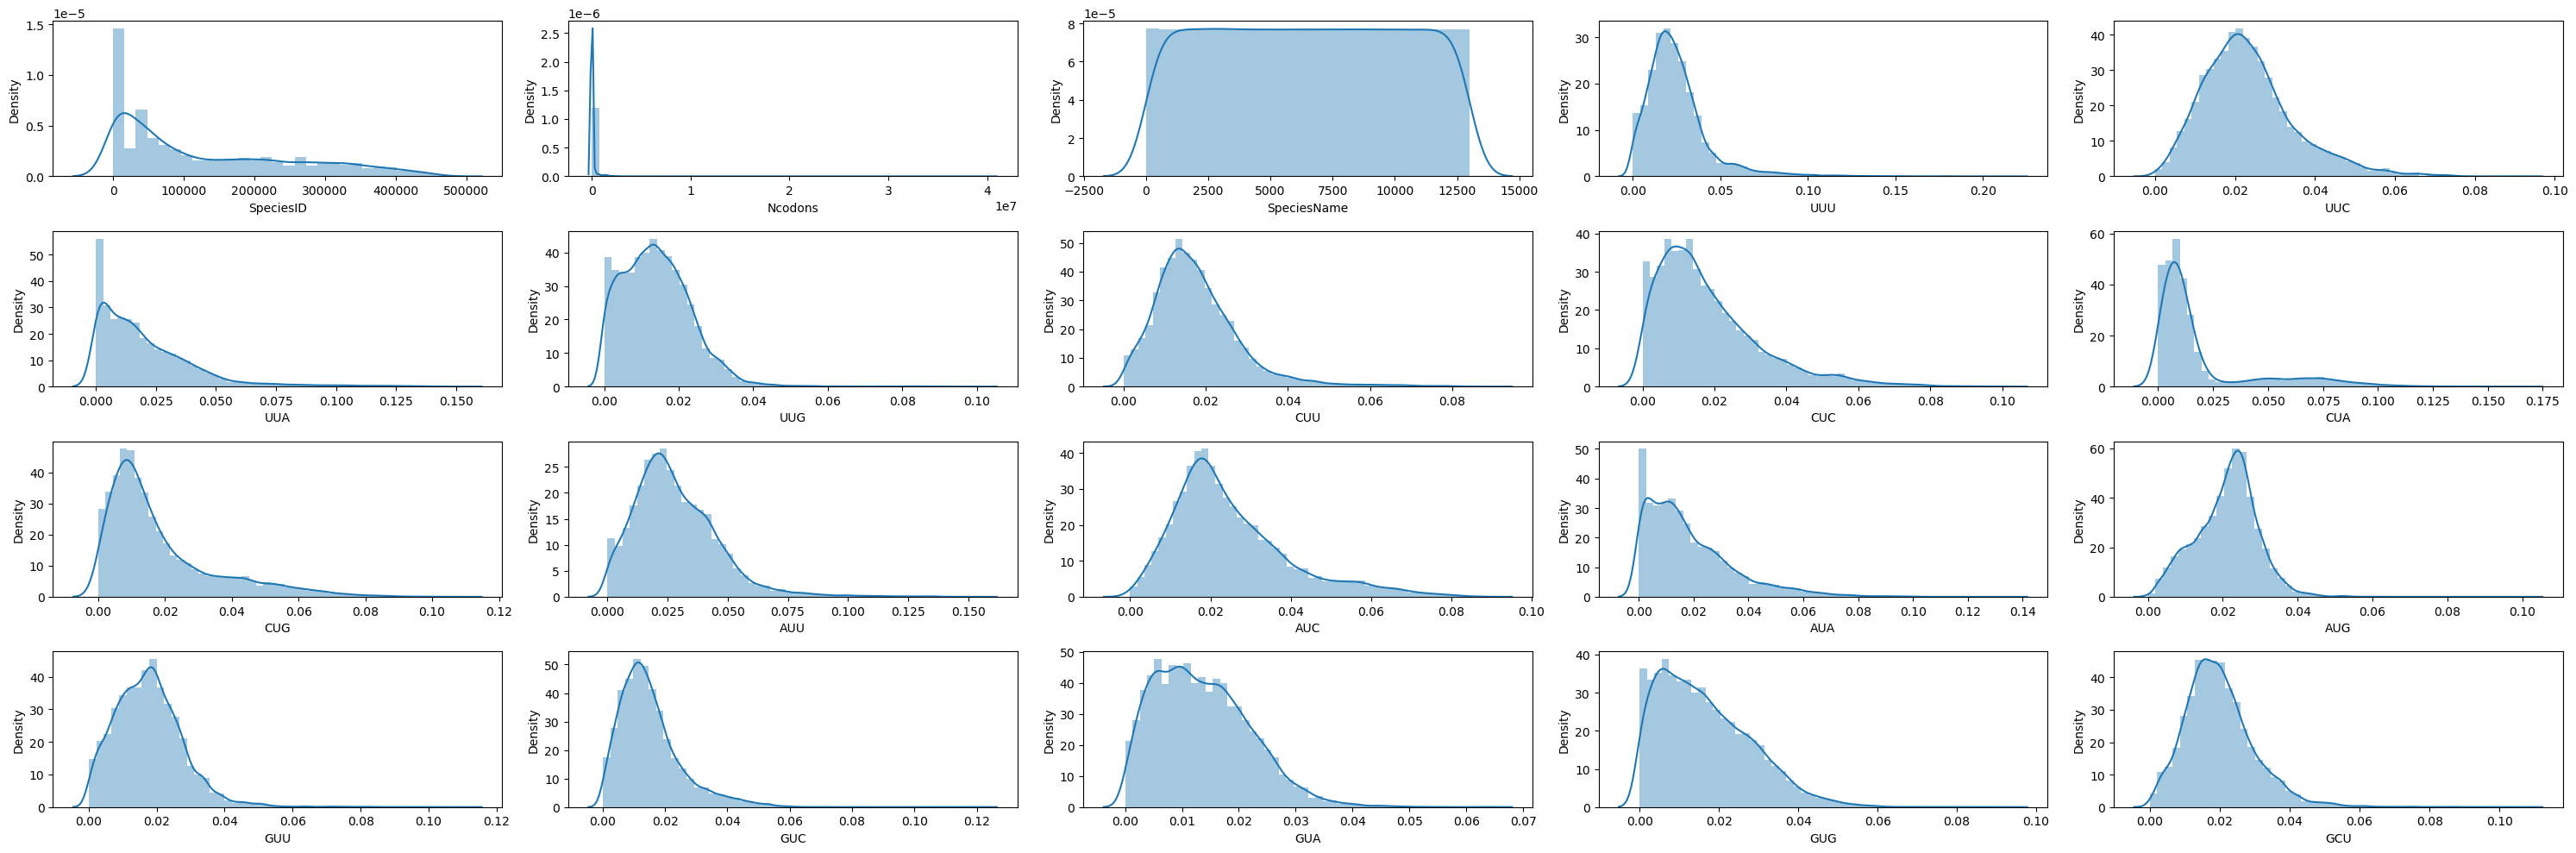

In [57]:
width = 30
height = 10

plt.style.use('default')

figure, axes = plt.subplots(nrows=4, ncols=5, figsize=(width, height))

for column, axe in zip(preprocess_dataset, axes.flatten()):
    if (column == 'class'):
       continue
    sns.distplot(preprocess_dataset[column], ax=axe)
    
plt.tight_layout()

In [58]:
preprocess_dataset.max() #Valores maximos de los features, (valores muy grandes son outsiders)

0
SpeciesID      4.653640e+05
Ncodons        4.066258e+07
SpeciesName    1.301500e+04
UUU            2.173000e-01
UUC            9.169000e-02
                   ...     
GAA            1.448900e-01
GAG            1.585500e-01
UAA            4.520000e-02
UAG            2.561000e-02
UGA            1.067000e-01
Length: 67, dtype: float64

In [59]:
dataset['Kingdom'].value_counts() #Vemos la distribucoin de la data, la cual esta muy desbalanceada

bct    2920
vrl    2832
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

In [60]:
dataset['DNAtype'].value_counts() #Vemos la distribucoin de la data, la cual esta muy desbalanceada

0     9267
1     2899
2      816
4       31
12       5
9        2
3        2
11       2
5        2
6        1
7        1
Name: DNAtype, dtype: int64

In [61]:
preprocess_dataset

,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,...,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
1,100217,1995,2827,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752,0.02506,0.01103,0.04110,0.00902,0.03308,0.01003,0.05013,0.01554,0.01103,0.02356,0.03208,...,0.00501,0.02256,0.00301,0.03108,0.00401,0.02607,0.00251,0.01153,0.00501,0.02356,0.01053,0.03860,0.00401,0.00702,0.00401,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
2,100220,1474,1087,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882,0.03324,0.00814,0.04071,0.00814,0.03256,0.01085,0.04885,0.01221,0.01357,0.00678,0.02714,...,0.00475,0.02917,0.00407,0.02374,0.00882,0.02917,0.00271,0.01628,0.00204,0.01967,0.00543,0.03392,0.00136,0.00678,0.00136,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
3,100755,4862,8252,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316,0.02180,0.01625,0.01872,0.01213,0.01070,0.02406,0.01234,0.01440,0.00514,0.01604,0.01460,...,0.02612,0.01275,0.01522,0.02365,0.02962,0.01789,0.01625,0.01234,0.01604,0.01687,0.02077,0.03949,0.00864,0.00596,0.00926,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
4,100880,1915,5480,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507,0.02924,0.02089,0.02141,0.01723,0.01932,0.02141,0.00679,0.02245,0.00522,0.01358,0.00418,...,0.02141,0.00888,0.01567,0.01253,0.02298,0.01358,0.00992,0.00888,0.00783,0.00679,0.03133,0.04282,0.00627,0.00261,0.00261,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
5,100887,22831,7577,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310,0.02773,0.02803,0.00508,0.00920,0.02965,0.02878,0.00574,0.01572,0.01577,0.01007,0.00508,...,0.02089,0.01367,0.01502,0.01809,0.02738,0.01796,0.01082,0.00705,0.01174,0.00858,0.03408,0.03964,0.00950,0.00429,0.00578,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13024,9601,1097,6305,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,0.03555,0.01459,0.03920,0.01003,0.02097,0.00912,0.02005,0.01003,0.03737,0.02279,0.01367,0.01094,0.00000,0.01641,0.01094,...,0.02370,0.02097,0.02917,0.03464,0.02005,0.02005,0.01459,0.02461,0.01367,0.01459,0.01914,0.03008,0.00182,0.00547,0.00547,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13025,9601,2067,12297,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,0.01258,0.03096,0.06386,0.03435,0.01258,0.00629,0.01258,0.01451,0.00871,0.01161,0.03338,0.02129,0.00242,0.00871,0.03338,...,0.01016,0.02080,0.02177,0.00339,0.00822,0.03532,0.00242,0.00435,0.00290,0.01693,0.02661,0.00290,0.00097,0.00726,0.00629,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13026,9602,1686,12298,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,0.01068,0.02728,0.06643,0.02669,0.01246,0.00297,0.01542,0.01423,0.00000,0.00949,0.03915,0.01720,0.00119,0.00830,0.04033,...,0.00712,0.02017,0.01898,0.00830,0.00652,0.03203,0.00119,0.00356,0.00474,0.02017,0.02432,0.00297,0.00119,0.00830,0.01186,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13027,9606,40662582,3585,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,0.03964,0.01600,0.02082,0.00749,0.02204,0.01103,0.01446,0.00708,0.02812,0.01845,0.02773,0.01582,0.00737,0.01754,0.01979,...,0.01219,0.01531,0.01234,0.03423,0.01696,0.01910,0.01058,0.01262,0.01086,0.01509,0.02444,0.03186,0.00454,0.01042,0.00617,0.01142,0.01217,0.01196,0.02178,0.02510,0.0

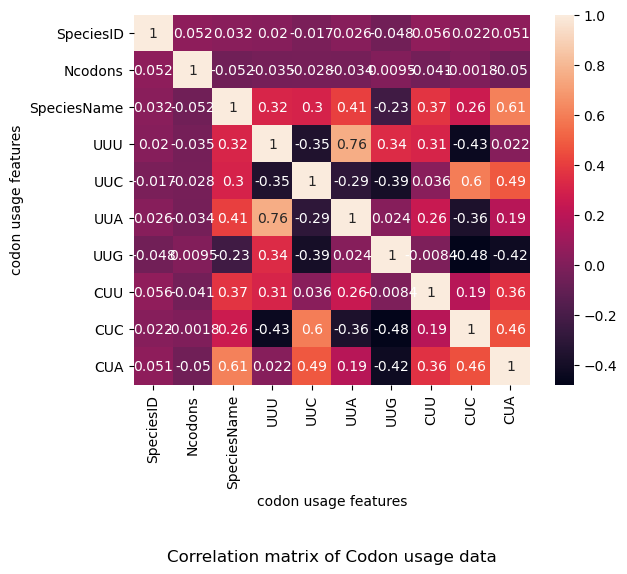

In [62]:

df_small = preprocess_dataset.iloc[:,:10]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)

plt.title("Correlation matrix of Codon usage data", y=-0.5)

plt.xlabel("codon usage features")

plt.ylabel("codon usage features")

plt.show()

In [308]:
preprocess_dataset.corr()

,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,...,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SpeciesID,1.000000,0.051598,0.031807,0.020128,-0.016876,0.025723,-0.047561,0.055892,0.021963,0.051111,-0.044642,0.036697,0.005852,0.033401,-0.046252,0.010858,-0.010495,0.036437,-0.064720,-0.047803,0.002322,0.026539,0.031263,-0.014679,0.014195,...,0.043598,-0.064636,0.053152,-0.041001,0.031605,-0.019295,-0.028383,-0.071218,0.041763,0.004909,0.016175,-0.077068,0.035849,0.017333,0.019185,0.011598,-0.026532,-0.000266,-0.005639,-0.029184,-0.014164,-0.079152,0.048676,-0.008848,0.050192
Ncodons,0.051598,1.000000,-0.051957,-0.035149,-0.028136,-0.033718,0.009483,-0.040623,-0.001755,-0.049954,0.081045,-0.039622,-0.002191,-0.047398,0.028350,-0.022570,0.034381,-0.044701,0.070384,-0.029450,0.038999,-0.022505,0.095830,-0.038599,-0.008935,...,-0.027046,-0.028911,-0.030054,0.060495,-0.015345,-0.031713,-0.023612,-0.002097,-0.009901,-0.013986,-0.008628,0.019153,0.016334,0.082777,-0.038159,0.068304,-0.010998,0.001491,0.024825,0.034597,0.028578,0.053022,-0.026197,0.003334,-0.047956
SpeciesName,0.031807,-0.051957,1.000000,0.316355,0.302723,0.408656,-0.225587,0.374362,0.262306,0.610629,-0.255622,0.431143,0.303256,0.497573,-0.464642,-0.133498,-0.224243,0.362686,-0.436629,-0.141804,0.054306,0.139244,-0.300834,-0.001223,0.182547,...,0.081010,-0.079636,0.078432,-0.510246,-0.073491,-0.052192,-0.218720,-0.271386,-0.011340,0.156353,-0.050003,-0.558147,-0.257495,-0.274638,0.380469,-0.208996,-0.243815,-0.352286,-0.445287,-0.390130,-0.265031,-0.516202,0.191300,0.010939,0.662834
UUU,0.020128,-0.035149,0.316355,1.000000,-0.354082,0.761457,0.337784,0.312873,-0.433270,0.022340,-0.488978,0.722344,-0.424834,0.497125,-0.128564,0.440196,-0.569204,0.434531,-0.381836,0.139372,-0.541571,-0.018439,-0.421591,0.263234,-0.383173,...,0.714942,-0.449039,0.214865,-0.462577,0.554565,-0.482267,0.281726,-0.317197,0.413125,-0.464667,0.398936,-0.345040,-0.012282,-0.473263,0.201127,-0.343592,0.303696,-0.104940,0.163590,-0.598978,0.154148,-0.452514,0.161928,0.008330,0.154603
UUC,-0.016876,-0.028136,0.302723,-0.354082,1.000000,-0.293122,-0.391906,0.035605,0.601418,0.485186,0.152207,-0.220739,0.739763,-0.037283,-0.261995,-0.438368,0.364931,-0.068793,-0.057398,-0.250316,0.424120,-0.057551,0.008998,-0.240558,0.460225,...,-0.440869,0.501000,-0.272133,-0.099074,-0.530613,0.493629,-0.367936,0.113392,-0.286651,0.596528,-0.448758,-0.135218,-0.265119,0.118025,0.242822,0.023877,-0.469426,-0.195738,-0.569699,0.198893,-0.464593,-0.078969,-0.013193,-0.046258,0.441124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAA,-0.014164,0.028578,-0.265031,0.154148,-0.464593,0.188387,0.315423,-0.027929,-0.532930,-0.286724,-0.291093,0.175480,-0.425997,-0.016999,0.255852,0.377519,-0.384229,0.255382,-0.190310,0.245570,-0.519709,0.133189,-0.164999,0.083510,-0.557169,...,0.403977,-0.345365,0.328463,-0.137658,0.520050,-0.289765,0.219948,-0.195342,0.335710,-0.523849,0.703729,0.112754,0.316040,-0.231728,-0.055278,-0.227873,0.476831,0.046443,0.684505,-0.218521,1.000000,-0.085190,0.075282,-0.019106,-0.401934
GAG,-0.079152,0.053022,-0.516202,-0.452514,-0.078969,-0.577686,0.115329,-0.430749,0.013373,-0.592600,0.561787,-0.636360,-0.117412,-0.588088,0.441239,-0.128572,0.530405,-0.578160,0.691541,-0.061741,0.280737,-0.354077,0.516263,-0.169079,0.074930,...,-0.356008,0.237738,-0.415608,0.696359,-0.303907,0.064699,0.020483,0.341369,-0.157216,0.115739,-0.337261,0.714357,0.147958,0.523439,-0.353652,0.524106,0.057005,0.477515,0.120136,0.672882,-0.085190,1.000000,-0.281574,0.004208,-0.582578
UAA,0.048676,-0.026197,0.191300,0.161928,-0.013193,0.256173,-0.126004,0.162526,0.014513,0.230416,-0.224573,0.

In [309]:
preprocess_dataset.var() #Revisamos la variancia, en casi todas esta alrededor de 1

0
SpeciesID      1.557182e+10
Ncodons        5.179695e+11
SpeciesName    1.412114e+07
UUU            3.107393e-04
UUC            1.345416e-04
                   ...     
GAA            2.057044e-04
GAG            2.255274e-04
UAA            3.362062e-06
UAG            8.221911e-07
UGA            1.070042e-04
Length: 67, dtype: float64